In [0]:
import tensorflow as tf

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from string import punctuation
from sklearn.model_selection import train_test_split
#STOPWORDS = set(stopwords.words('portuguese'))

STOPWORDS = set(stopwords.words('portuguese') + list(punctuation))


In [0]:
# Parâmetros Principais

# Tamanho do vocabulário a ser criado com o tokenizer. Este considera as N palavras mais comuns (ou frequentes nos textos)
vocab_size = 5000

# Tamanho do vetor de características que representa cada palavra. Cada palavra é transformada para um vetor com 64 entradas.
embedding_dim = 64

# Tamanho máximo da sequência de códigos que representa um texto (tamanho do feature vector)
max_length = 35

# Tipo de truncagem a ser utilizado, 'post' significa remover valores do final da sequência.
trunc_type = 'post'

# Tipo de padding a ser utilizado, 'post' significa completar no final da sequência.
padding_type = 'post'

# Token a ser utilizado quando uma palavra não presente no vocabulário é encontrada no texto
Not_known = '<NKN>'

# Porcentagem de instâncias a ser utilizada no treinamento
training_portion = .7

In [0]:
# Carrega os textos. Em X o texto de entrada e em y os rótulos.
# Cada linha do texto carrega é filtrada para retirada de stopwords.

def ler(file):
    with open(file, 'r', encoding='latin-1') as csvfile:
        texto = csv.reader(csvfile, delimiter=';')      # lê um texto do arquivo
        print(texto)
        next(texto)
        for linha in texto:       # processa cada linha do texto
            y.append(linha[2])
            aux = linha[0]
            for word in STOPWORDS:        # retirada de stopwords
                token = ' ' + word + ' '
                aux = aux.replace(token, ' ')
                aux = aux.replace(' ', ' ')
            X.append(aux)
X = []
y = []
ler('g1_v2_ws.csv')
ler('g1_v1_ws.csv')

print(len(y))       # quantidade de rótulos
print(len(X))       # quantidade de textos

train_X, validation_X, train_y, validation_y = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)
print(train_y)
print(validation_y)

2732
2732
['alegria', 'medo', 'medo', 'alegria', 'tristeza', 'desgosto', 'tristeza', 'desgosto', 'desgosto', 'alegria', 'desgosto', 'neutro', 'desgosto', 'surpresa', 'alegria', 'surpresa', 'medo', 'surpresa', 'desgosto', 'raiva', 'desgosto', 'raiva', 'medo', 'neutro', 'raiva', 'surpresa', 'tristeza', 'desgosto', 'surpresa', 'medo', 'tristeza', 'medo', 'alegria', 'alegria', 'alegria', 'tristeza', 'alegria', 'alegria', 'medo', 'alegria', 'tristeza', 'desgosto', 'alegria', 'alegria', 'neutro', 'tristeza', 'desgosto', 'tristeza', 'surpresa', 'tristeza', 'tristeza', 'neutro', 'surpresa', 'tristeza', 'tristeza', 'alegria', 'surpresa', 'tristeza', 'tristeza', 'desgosto', 'tristeza', 'tristeza', 'tristeza', 'neutro', 'raiva', 'alegria', 'desgosto', 'neutro', 'tristeza', 'alegria', 'tristeza', 'alegria', 'raiva', 'raiva', 'desgosto', 'tristeza', 'desgosto', 'surpresa', 'neutro', 'surpresa', 'medo', 'alegria', 'neutro', 'desgosto', 'surpresa', 'desgosto', 'tristeza', 'tristeza', 'tristeza', 'rai

In [0]:
# Cria o vocabulário a partir da base de treinamento considerando o tamanho definido em vocab_size.
# Utiliza como coringa o símbolo Not_known
tokenizer = Tokenizer(num_words = vocab_size, oov_token=Not_known)
tokenizer.fit_on_texts(train_X)
word_index = tokenizer.word_index

In [0]:
# Lista os N primeiros vocábulos do dicionários (os N mais frequentes)
N=10
dict(list(word_index.items())[0:N])


{'<NKN>': 1,
 'anos': 3,
 'após': 7,
 'contra': 6,
 'diz': 2,
 'eua': 10,
 'feira': 8,
 'governo': 9,
 'presidente': 5,
 'segundo': 4}

In [0]:
# Converte uma linha de texto em uma sequência de valores
train_sequences = tokenizer.texts_to_sequences(train_X)

In [0]:
# Mostra uma linha de texto convertida para sequência de valores
# Cada valor representa uma palavra do vocabulário
print(train_sequences[5])

[1884, 1885, 1, 749, 832, 1, 833, 1, 265, 31, 87, 53, 131, 3, 24, 32, 936, 1293, 1, 336, 1]


In [0]:
# Transforma todas as sequências para um tamanho fixo. Sequências pequenas são completadas e sequências maiores que o limite são truncadas
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

23
35
21
35
16
35


In [0]:
# Imprime uma sequência
print(train_padded[6])

[1886 1294 3294 3295  937 3296   60  251 2507   53 3297  559 3298  213
  150   59    8   88    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [0]:
# Tokeniza a base de validação.

validation_sequences = tokenizer.texts_to_sequences(validation_X)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

820
(820, 35)


In [0]:
# Mostra o conjunto de rótulos
print(set(y))

{'desgosto', 'medo', 'surpresa', 'raiva', 'tristeza', 'alegria', 'neutro'}


In [0]:
# Tokeniza os rótulos
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)

# Observe que subtraímos 1 dos códigos para estes comecem em 0
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_y))-1
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_y))-1

In [0]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[400])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[50])
print(validation_label_seq.shape)

[0]
[3]
[1]
(1912, 1)
[5]
[6]
[2]
(820, 1)


In [0]:
# Confere como ficaram as nossas frases depois de transformdas
# Apenas para conferência.

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_X[10])

polícia obriga moussavi deixar cerimônia luto irã manifestantes presos segundo testemunhas homenagem vítimas confrontos feita cemitério ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
 Polícia obriga Moussavi deixar cerimônia luto Irã Manifestantes presos, segundo testemunhas. Homenagem vítimas confrontos feita cemitério.


In [0]:

# Criando a rede LSTM (Long Short Term Memory)

hidden_size=64
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
#model.add(tf.keras.layers.LSTM(embedding_dim, dropout = 0.25 , recurrent_dropout=0.25))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

# Compilando a LSTM
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento da LSTM
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_87 (Embedding)     (None, None, 64)          320000    
_________________________________________________________________
bidirectional_62 (Bidirectio (None, 128)               66048     
_________________________________________________________________
dense_155 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_156 (Dense)            (None, 7)                 455       
Total params: 394,759
Trainable params: 394,759
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60/60 - 1s - loss: 1.8955 - accuracy: 0.1977 - val_loss: 1.8428 - val_accuracy: 0.3146
Epoch 2/10
60/60 - 1s - loss: 1.6434 - accuracy: 0.3703 - val_loss: 1.6045 - val_accuracy: 0.3854
Epoch 3/10
60/60 - 1s - loss: 1.1472 - accuracy: 

In [0]:
# Criando uma RNN (Recurrent Neural Network)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(tf.keras.layers.SimpleRNN(units=64))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='softmax'))
model.summary() 

# Compilando a RNN
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento da RNN
history = model.fit(train_padded, training_label_seq, batch_size=32, epochs=10, validation_data=(validation_padded, validation_label_seq), verbose=2)



Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_101 (Embedding)    (None, 35, 64)            320000    
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 64)                8256      
_________________________________________________________________
dense_173 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_174 (Dense)            (None, 7)                 455       
Total params: 332,871
Trainable params: 332,871
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60/60 - 2s - loss: 1.8497 - accuracy: 0.2631 - val_loss: 1.7715 - val_accuracy: 0.3159
Epoch 2/10
60/60 - 2s - loss: 1.2190 - accuracy: 0.6056 - val_loss: 1.6458 - val_accuracy: 0.4427
Epoch 3/10
60/60 - 2s - loss: 0.6083 - accuracy:

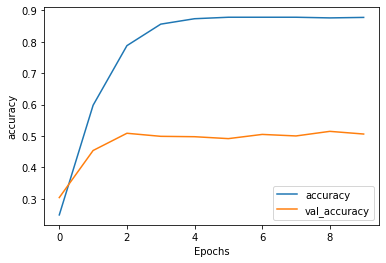

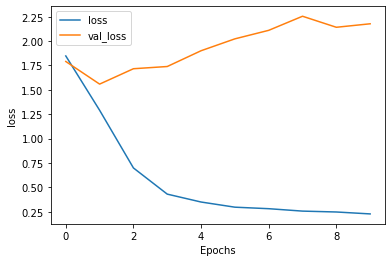

In [0]:
# Imprime gráfico histórico do treinamento
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
  

In [0]:
# Testando uma frase

txt = ["Clientes de shopping se assustam com suposta bomba deixada por trio durante assalto. Os bandidos deixaram a suposta bomba em cima do balcão da loja, deixando os funcionários e clientes assustados."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
labels = ['desgosto', 'medo', 'surpresa', 'raiva', 'tristeza', 'alegria', 'neutro']
print(pred, labels[np.argmax(pred)])

print("Resultado na validacao:")
score=model.evaluate(validation_padded, validation_label_seq, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



[[0.7273306  0.01675132 0.01504662 0.01236244 0.02641146 0.00720335
  0.1948942 ]] desgosto
Resultado na validacao:
Test loss: 2.176917791366577
Test accuracy: 0.5060975551605225


In [0]:
# Plotar a matrix de confusão 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
   
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization


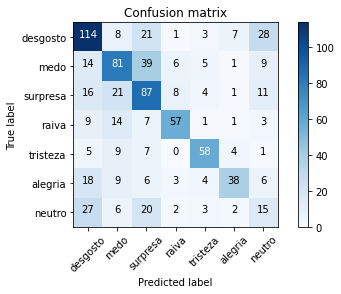

In [0]:
# Preparar Matriz de Confusão
import itertools
from sklearn.metrics import confusion_matrix
y_predict=model.predict_classes(validation_padded)
val=validation_label_seq.reshape(len(validation_label_seq))
cm=confusion_matrix(val, y_predict)
cm_plot_labels=['desgosto', 'medo', 'surpresa', 'raiva', 'tristeza', 'alegria', 'neutro']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix')
